<a href="https://colab.research.google.com/github/04abhinavsharma/Student-ScorePredictor/blob/main/Student_ScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [ ]:
df=pd.read_csv('/content/student-mat.csv')
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
107,GP,M,16,U,GT3,T,3,3,services,other,...,5,3,3,1,1,5,2,16,18,18
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,3,4,3,5,3,8,9,9,10
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
237,GP,F,16,U,GT3,T,2,1,other,other,...,4,5,2,1,1,5,20,13,12,12
357,MS,F,17,U,LE3,A,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11


In [ ]:
for i in df.columns:
  print(i,df[i].isnull().sum()/df.shape[0]*100)

school 0.0
sex 0.0
age 0.0
address 0.0
famsize 0.0
Pstatus 0.0
Medu 0.0
Fedu 0.0
Mjob 0.0
Fjob 0.0
reason 0.0
guardian 0.0
traveltime 0.0
studytime 0.0
failures 0.0
schoolsup 0.0
famsup 0.0
paid 0.0
activities 0.0
nursery 0.0
higher 0.0
internet 0.0
romantic 0.0
famrel 0.0
freetime 0.0
goout 0.0
Dalc 0.0
Walc 0.0
health 0.0
absences 0.0
G1 0.0
G2 0.0
G3 0.0


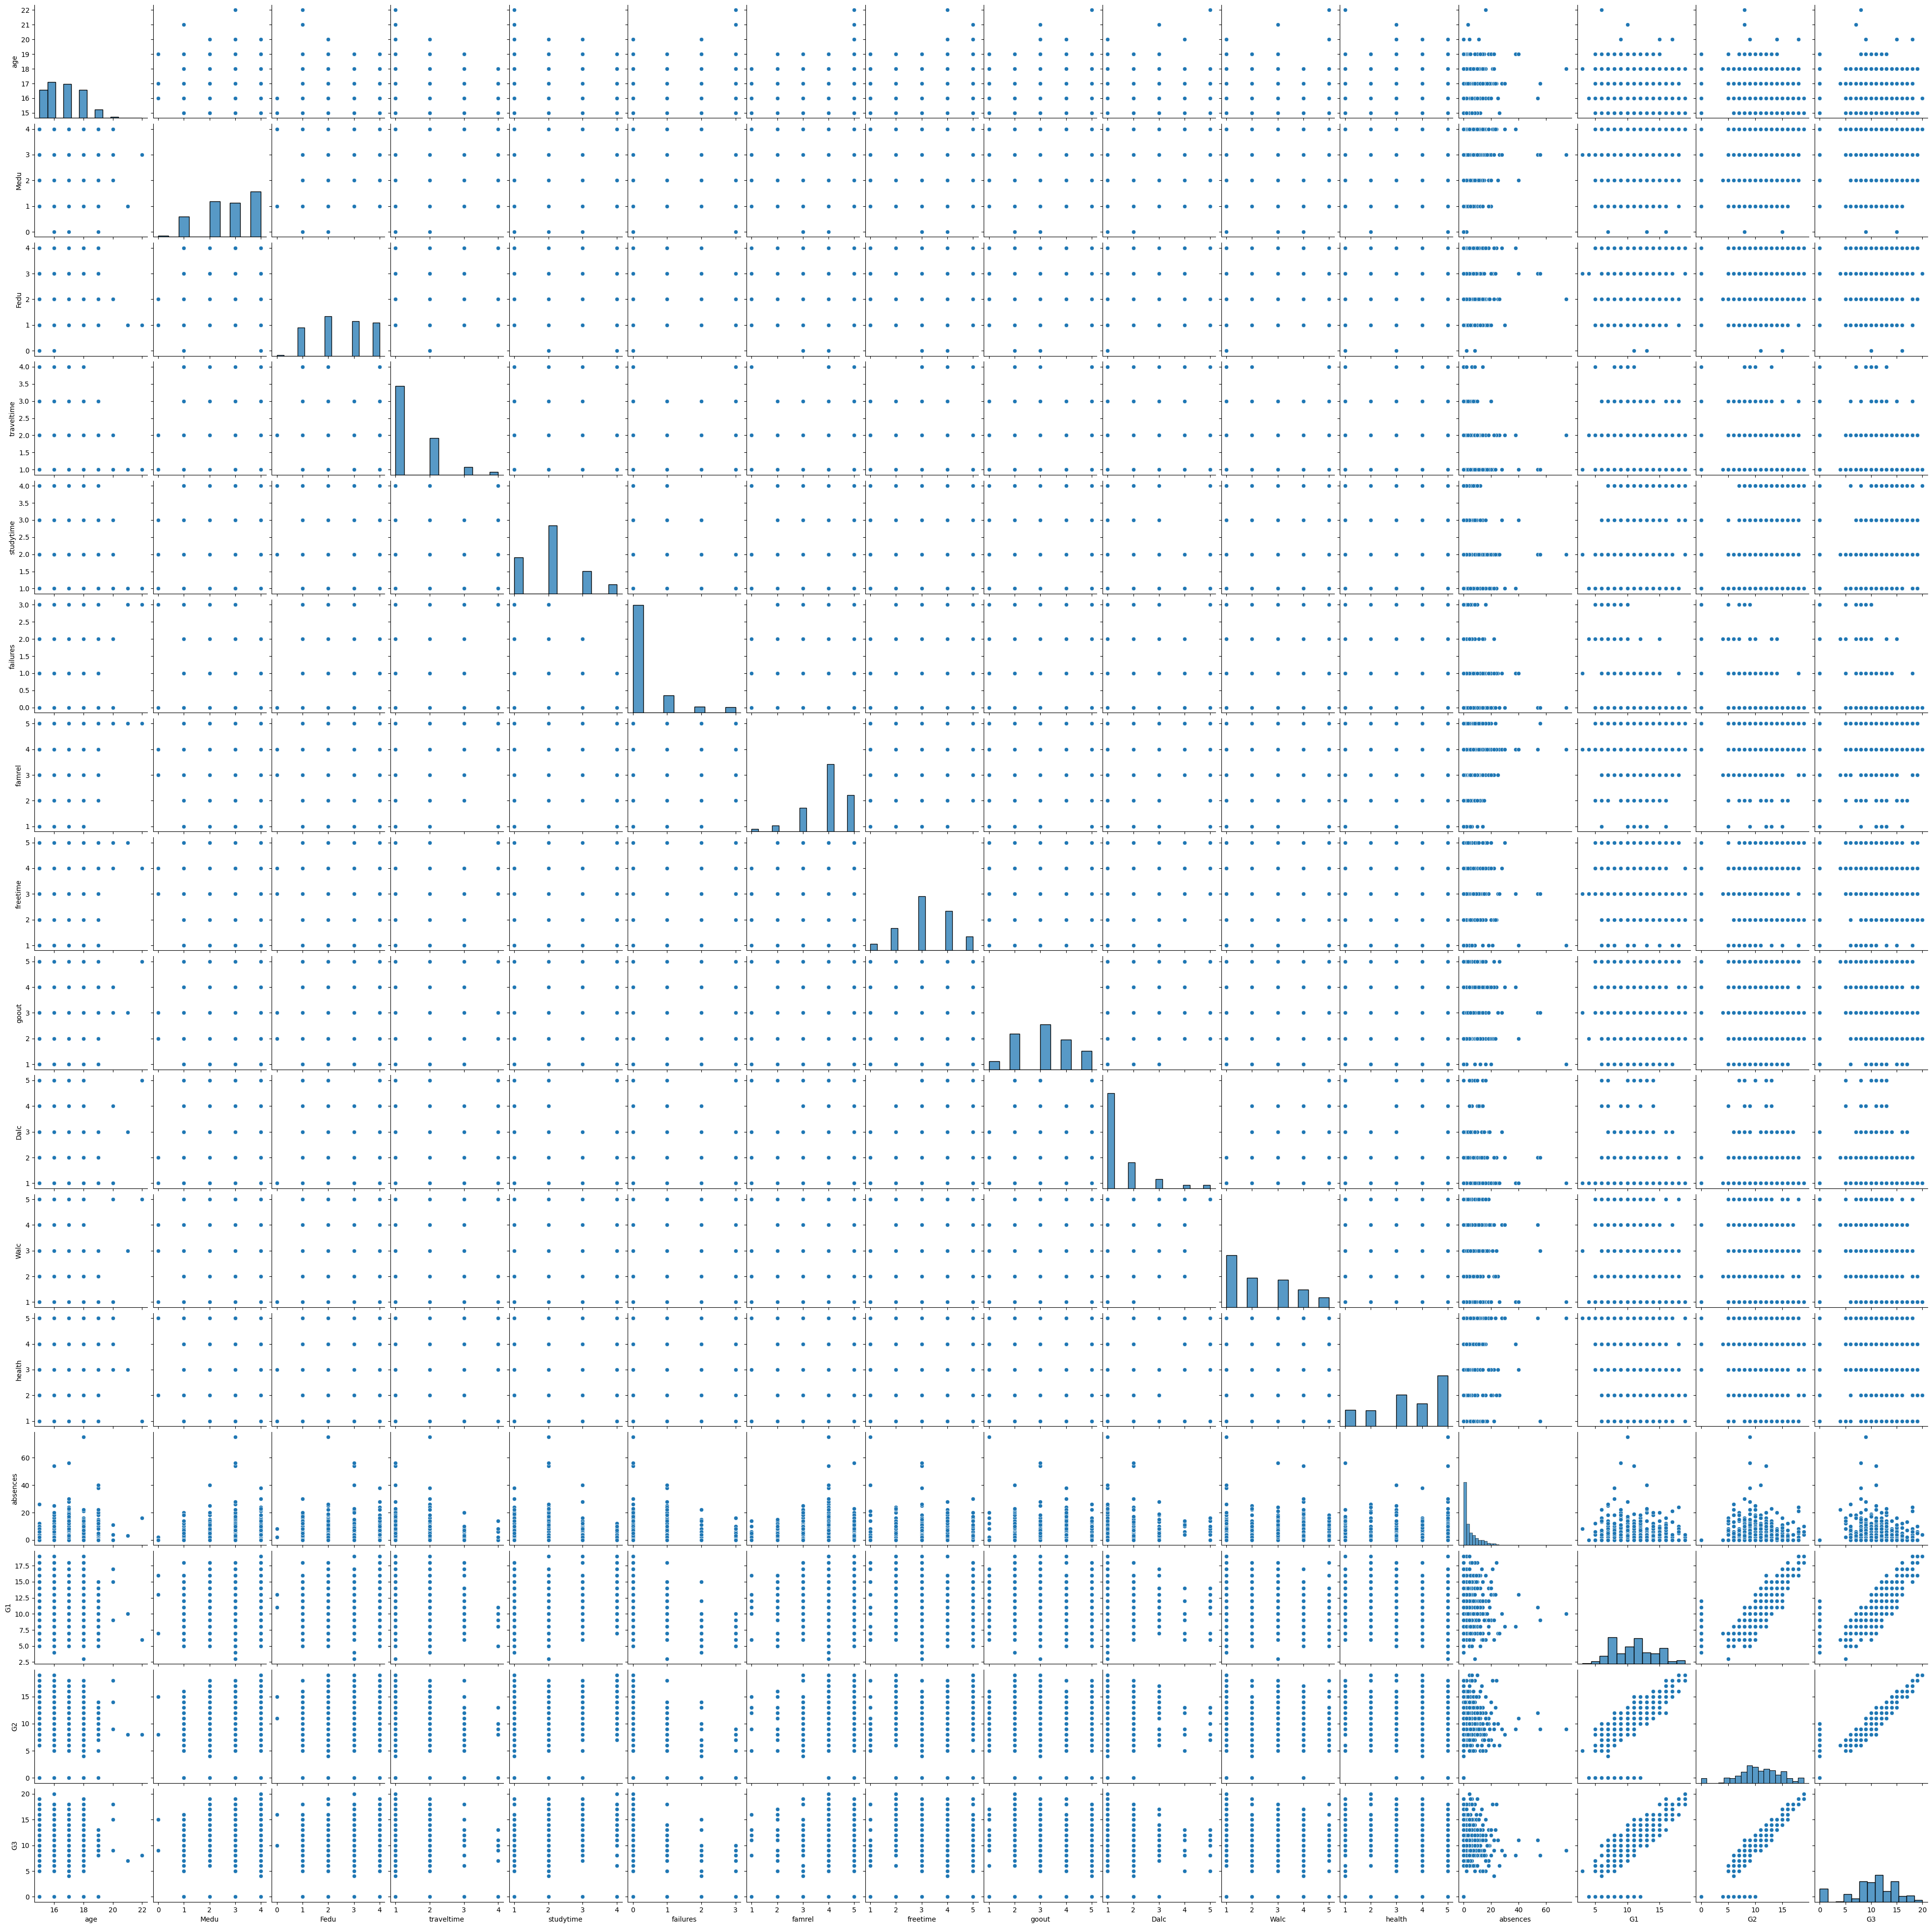

In [ ]:
sns.pairplot(df)

<Figure size 800x400 with 0 Axes>

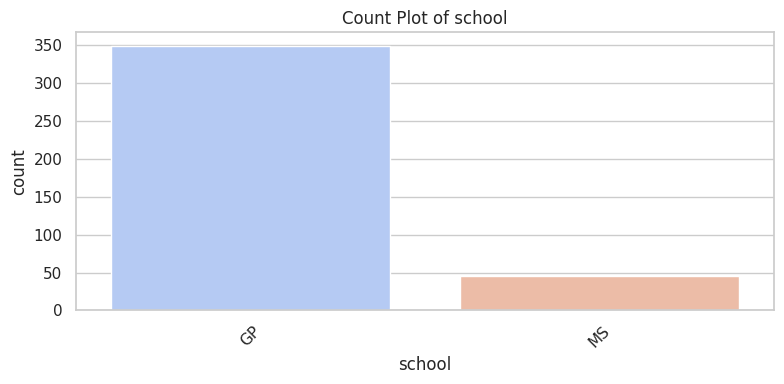

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

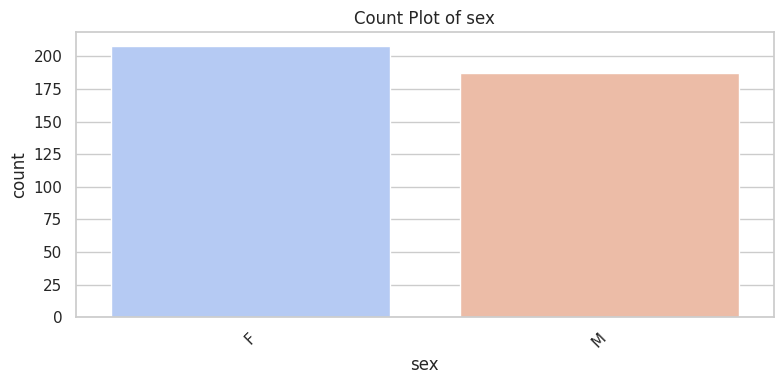

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

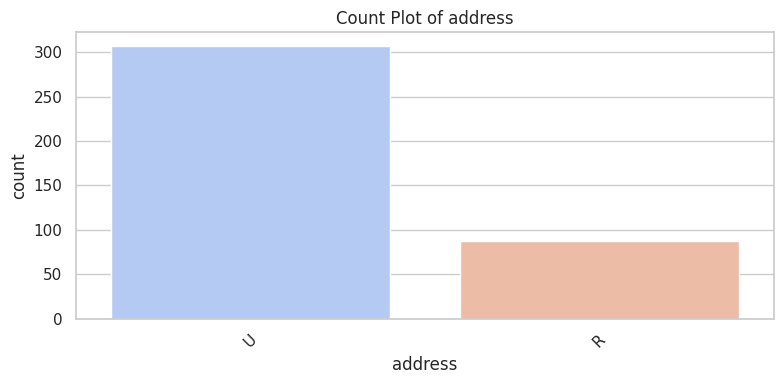

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

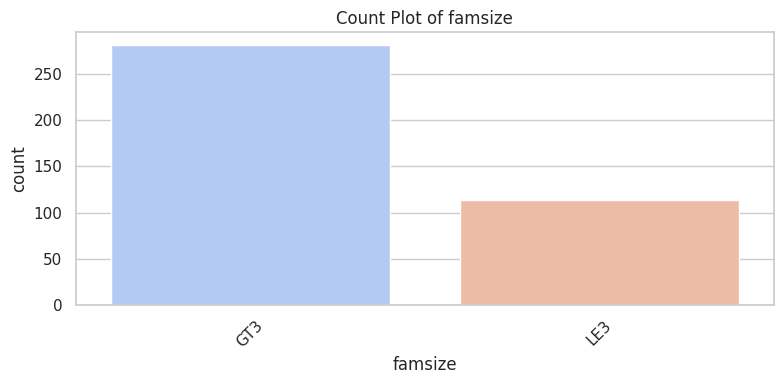

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

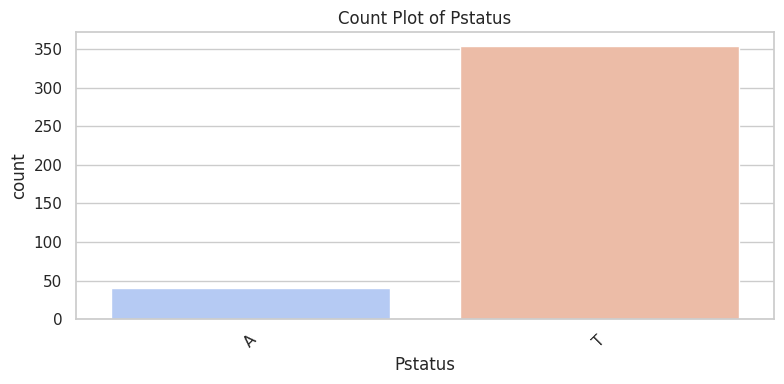

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

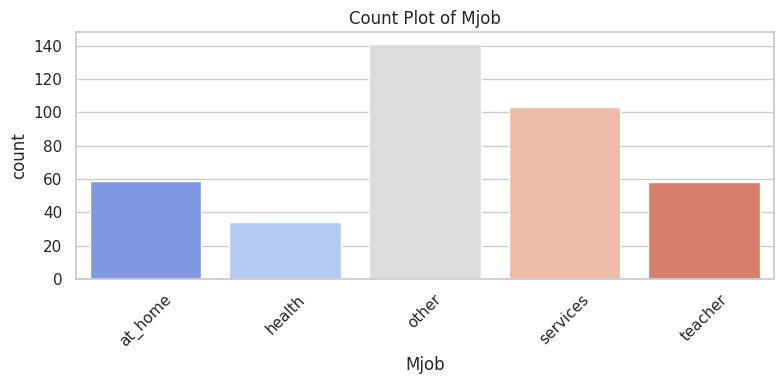

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

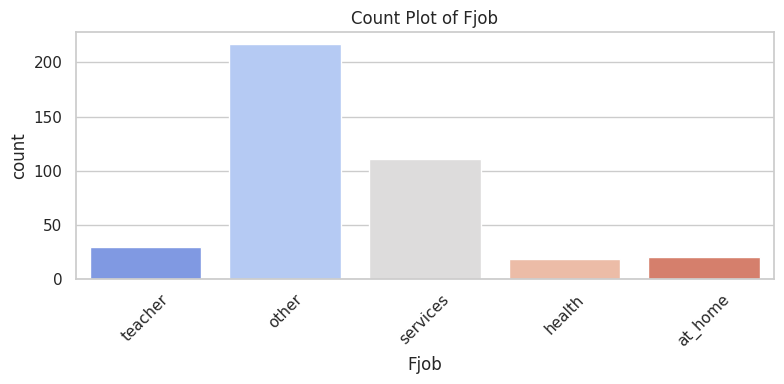

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

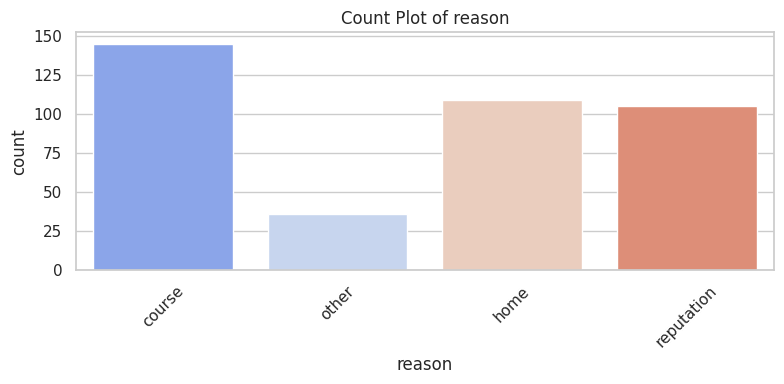

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

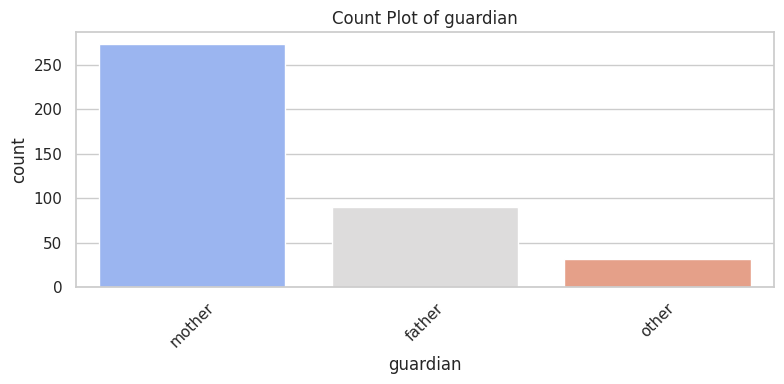

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

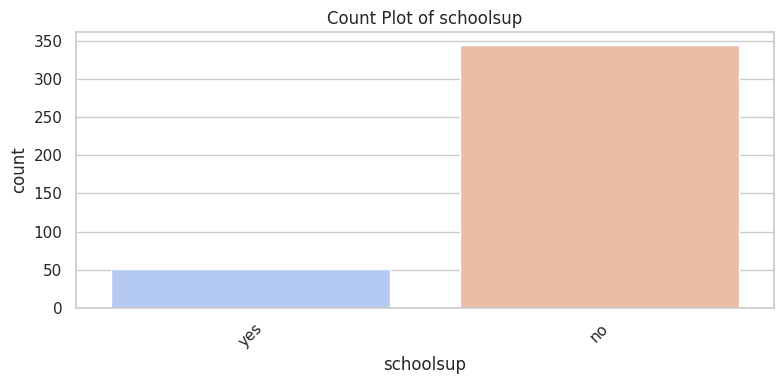

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

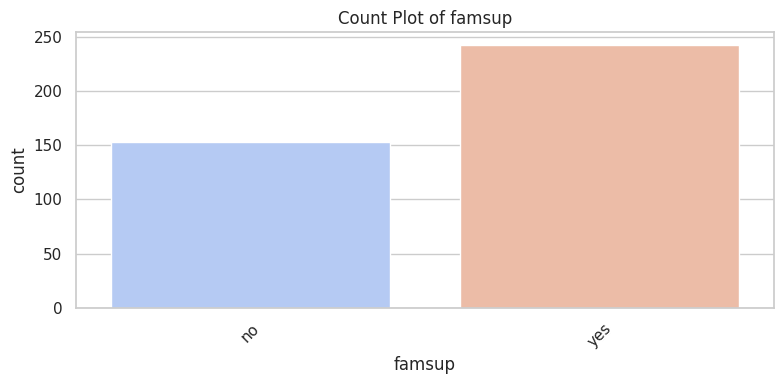

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

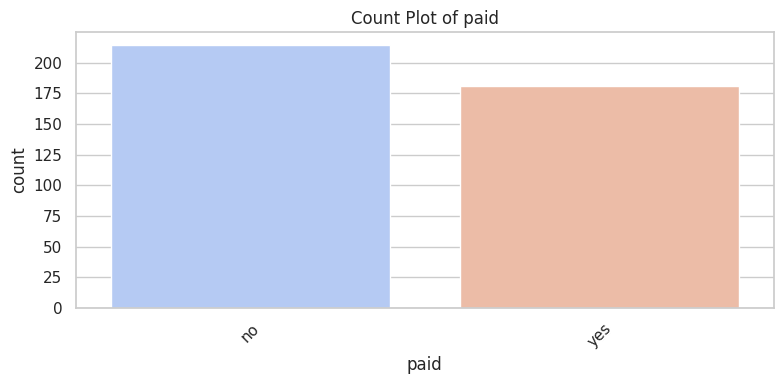

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

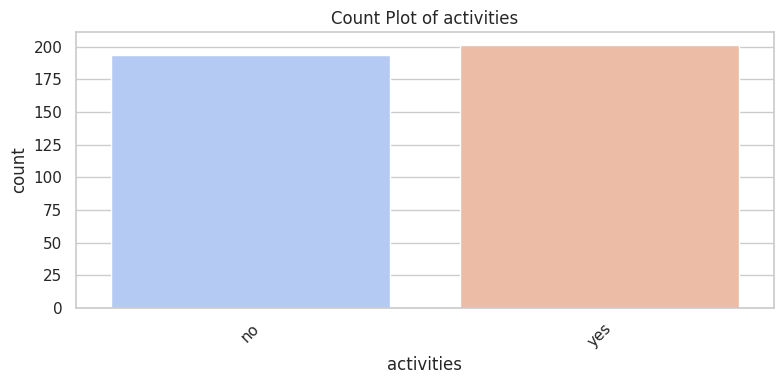

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

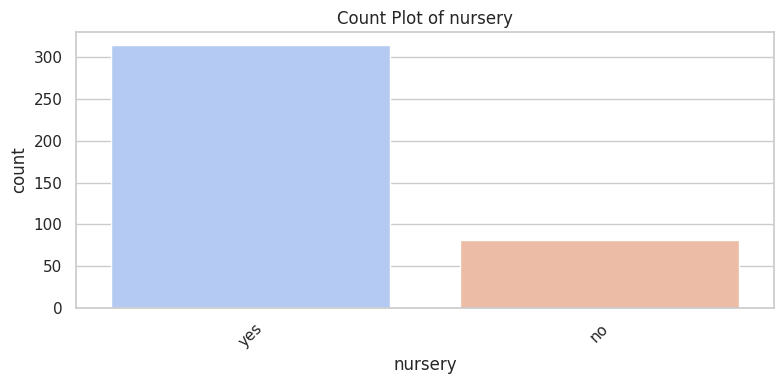

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

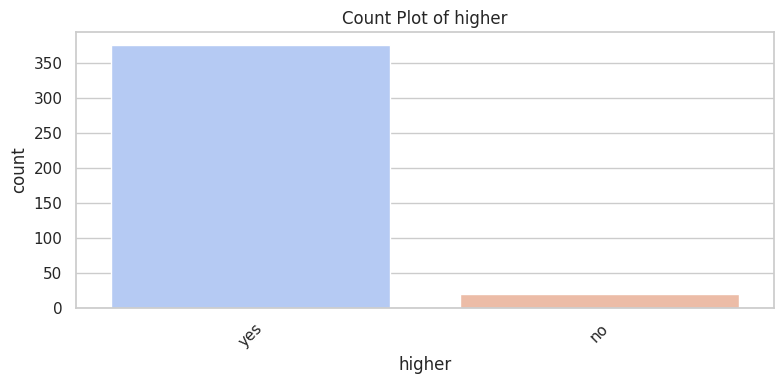

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

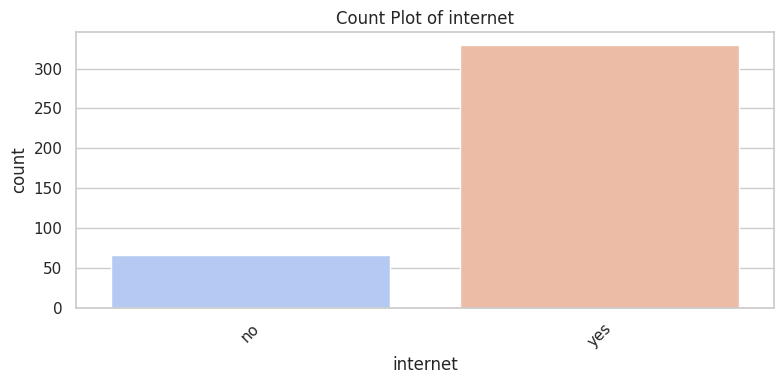

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

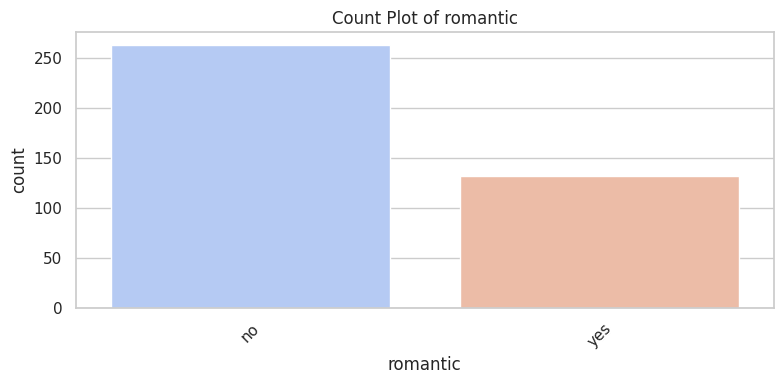

<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [ ]:
# Set visual style
sns.set(style="whitegrid")

# Iterate over all columns
for col in df.columns:
    plt.figure(figsize=(8, 4))

    if not pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, palette="coolwarm", legend=False,hue=col)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    plt.tight_layout()
    plt.show()

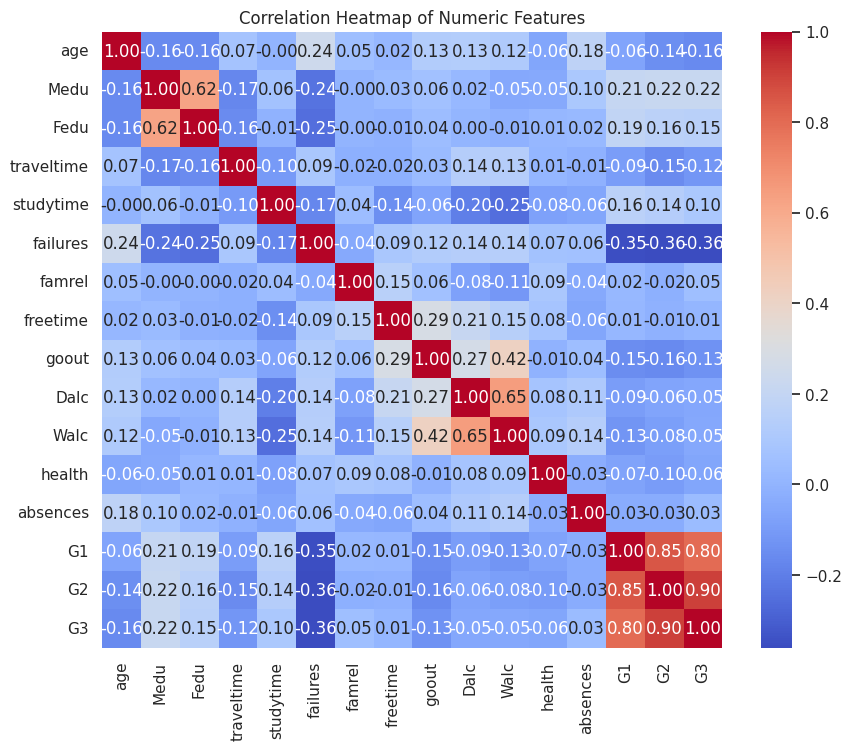

In [ ]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])  # only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



In [ ]:
# 1. Binary categorical columns
binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
               'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'higher', 'internet', 'romantic']

# Mapping binary categories to 0 and 1
binary_map = {
    'GP': 0, 'MS': 1,
    'F': 0, 'M': 1,
    'U': 0, 'R': 1,
    'LE3': 0, 'GT3': 1,
    'T': 1, 'A': 0,
    'yes': 1, 'no': 0
}

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# 2. One-hot encode nominal (non-binary) categorical columns
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# 3. Final shape and check
print("Final dataframe shape:", df.shape)
print(df.head())


Final dataframe shape: (395, 42)
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        0        1        0     4     4           2   
1       0    0   17        0        1        1     1     1           1   
2       0    0   15        0        0        1     1     1           1   
3       0    0   15        0        1        1     4     2           1   
4       0    0   16        0        1        1     3     3           1   

   studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0          2  ...         False        False       False          False   
1          2  ...         False        False        True          False   
2          2  ...         False        False        True          False   
3          3  ...         False        False       False           True   
4          2  ...         False        False        True          False   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0     

<Axes: ylabel='absences'>

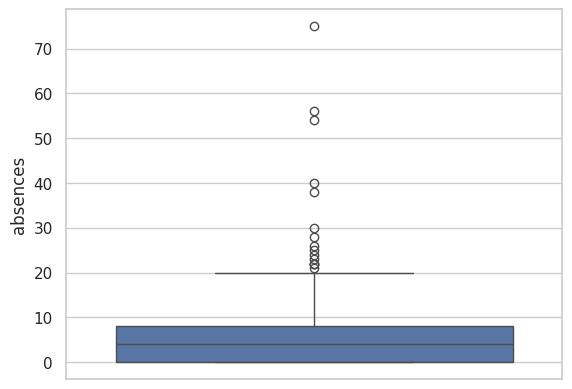

In [ ]:
import seaborn as sns
sns.boxplot(df['absences'])  # Identify outliers


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 5.66
R² Score: 0.72


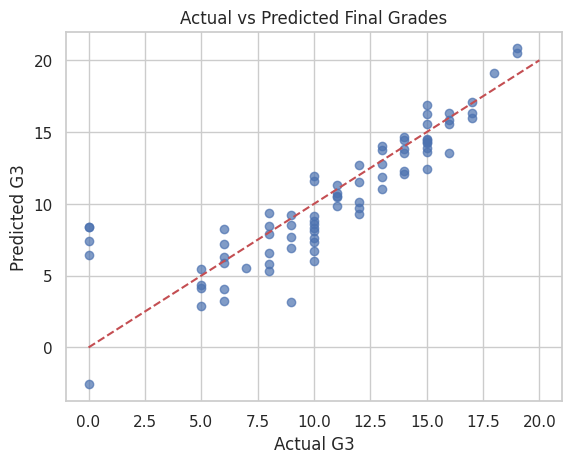

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.plot([0, 20], [0, 20], 'r--')  # identity line
plt.show()


In [ ]:
print("coeff:", lr.coef_)
print("intercept:",lr.intercept_)

coeff: [ 0.09381411  0.3744096  -0.11592662 -0.08261237  0.00877173 -0.14039393
  0.08631677 -0.16737768  0.08859282 -0.00774276 -0.28578115  0.78565167
  0.20365619  0.06722228 -0.51749961 -0.23686146  0.3753768  -0.16820426
 -0.39035251  0.31496242 -0.02022574  0.18985939 -0.18550918  0.05390572
  0.04402694  0.05559269  0.2116987   0.95777208 -0.4632439  -0.23719518
 -0.0516432   0.09915197  0.4812421   0.20644054 -0.29476201 -0.06829101
 -0.61190072  0.30497262 -0.22169394  0.09530352 -0.1492908 ]
intercept: -1.9231831994364619
